In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

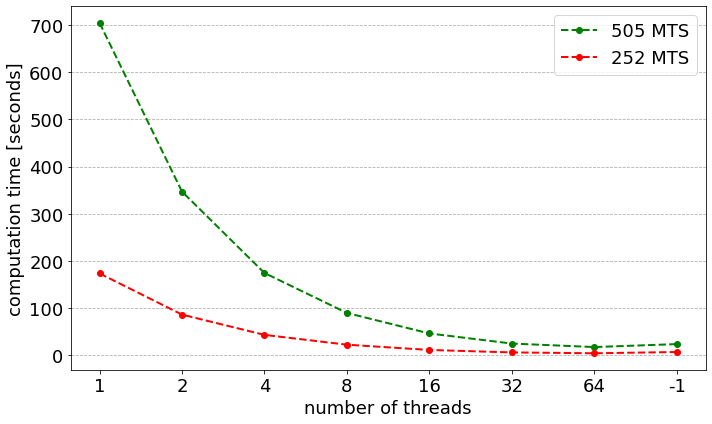

In [24]:
# 505 MTS
dicc = {}
number = 2**7
n_threads = [2**n for n in range(number) if 2**n < number]
n_threads.append(-1)
data = np.loadtxt('../results_E2_financeData/dtwParallel_505_mult_threads.txt', dtype=str)
for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
values_505 = []

ymin = []
ymax = []

keys = n_threads
for i in range(len(keys)):
    ymin.append(np.min(dicc[keys[i]]))
    ymax.append(np.max(dicc[keys[i]]))
    values_505.append(np.mean(dicc[keys[i]]))
    
# 256 MTS
dicc = {}
number = 2**7
n_threads = [2**n for n in range(number) if 2**n < number]
n_threads.append(-1)
data = np.loadtxt('../results_E2_financeData/dtwParallel_252_mult_threads.txt', dtype=str)
for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
values_256 = []

ymin = []
ymax = []

keys = n_threads
for i in range(len(keys)):
    ymin.append(np.min(dicc[keys[i]]))
    ymax.append(np.max(dicc[keys[i]]))
    values_256.append(np.mean(dicc[keys[i]]))

fig, axis = plt.subplots(1,1,figsize=(10,6))

axis.plot(values_505,'go--',linewidth=2,alpha=1, label="505 MTS")
axis.plot(values_256,'ro--',linewidth=2,alpha=1, label="252 MTS")


# plt.fill_between(np.arange(len(n_threads)), ymin, ymax, alpha=0.2, color='green',label='error band')

keys_finales = list(map(str, n_threads)) 
plt.xticks(np.arange(len(n_threads)), keys_finales, fontsize=18)
keys_finales_2 = np.arange(0,750,100)
plt.yticks(keys_finales_2, fontsize=18)
axis.set_xlabel('number of threads',fontsize=18) 
axis.set_ylabel('computation time [seconds]',fontsize=18) 
plt.tight_layout()
axis.yaxis.grid(linestyle = 'dashed')  # grid lines
axis.set_axisbelow(True)  # grid lines are behind the rest
plt.legend(fontsize=18)
plt.savefig("./Figures/dtwParallel_dtw_D.png")

## Comparison of computational time with other packages.

In [8]:
data = np.loadtxt('../results_E2_financeData/DataResultsTimePaper/dtw_505.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtw_value = np.mean(a)

data = np.loadtxt('../results_E2_financeData/DataResultsTimePaper/fastdtw_505.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
fastdtw_value = np.mean(a)

data = np.loadtxt('../results_E2_financeData/DataResultsTimePaper/dtaidistance_505.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtaidistance_value = np.mean(a)

data = np.loadtxt('../results_E2_financeData/DataResultsTimePaper/tslearn_505.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
tslearn_value = np.median(a)

data = np.loadtxt('../results_E2_financeData/DataResultsTimePaper/dtwParallel_505.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtwParallel = np.median(a)
    
values_505 = [dtw_value, fastdtw_value, dtaidistance_value, tslearn_value, dtwParallel]

In [9]:
data = np.loadtxt('../results_E2_financeData/DataResultsTimePaper/dtw_252.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtw_value = np.mean(a)

data = np.loadtxt('../results_E2_financeData/DataResultsTimePaper/fastdtw_252.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
fastdtw_value = np.mean(a)

data = np.loadtxt('../results_E2_financeData/DataResultsTimePaper/dtaidistance_252.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtaidistance_value = np.mean(a)

data = np.loadtxt('../results_E2_financeData/DataResultsTimePaper/tslearn_252.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
tslearn_value = np.median(a)

data = np.loadtxt('../results_E2_financeData/DataResultsTimePaper/dtwParallel_252.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtwParallel = np.median(a)
    
values_252 = [dtw_value, fastdtw_value, dtaidistance_value, tslearn_value, dtwParallel]

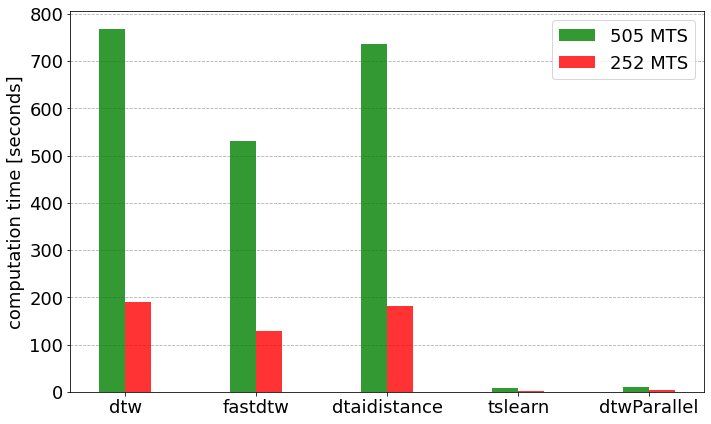

In [14]:
fig,axis = plt.subplots(1,1,figsize=(10,6))

numberOfTestPackage = 5

plt.bar(np.arange(numberOfTestPackage), values_505, color='green', width=0.2, alpha=0.8, label="505 MTS")
plt.bar(np.arange(numberOfTestPackage)+0.2, values_252, color='red', width=0.2, alpha=0.8, label="252 MTS")

keys_finales = ['dtw', 'fastdtw', 'dtaidistance', 'tslearn', 'dtwParallel']
plt.xticks(np.arange(numberOfTestPackage)+0.1, keys_finales, fontsize=18)
keys_finales_2 = np.arange(0,850,100)
plt.yticks(keys_finales_2, fontsize=18)
axis.set_ylabel('computation time [seconds]',fontsize=18) 
plt.tight_layout()
axis.yaxis.grid(linestyle = 'dashed')  # grid lines
axis.set_axisbelow(True)  # grid lines are behind the rest
plt.legend(fontsize=18)

plt.savefig("./Figures/comparativeTime.png")

## Comparison of computational time between tslearn and dtwParallel.

In [11]:
test = [20, 100, 200, 500]

tslearn_value = []
for t in range(len(test)):
    data = np.loadtxt('./E2_FinanceData/ExamplesTimeExecutionNewLibraries/OthersResults/tslearn_'+str(test[t])+'days_datanorm_v4.txt', dtype=str)
    a = [word.rstrip(",[]") for word in data]
    a[0] = a[0][1:]
    a = [float(i) for i in a]
    tslearn_value.append(np.mean(a))
    
tslearn_value

[8.166998028755188, 27.701638412475585, 78.61794930299124, 407.03815813064574]

In [12]:
import numpy as np
test = [20,100,200,500]

dtwParallel_value = []
for t in range(len(test)):
    data = np.loadtxt('./E2_FinanceData/OthersResults/dtwParallel_'+str(test[t])+'days_datanorm_opt_v4.txt', dtype=str)
    a = [word.rstrip(",[]") for word in data]
    a[0] = a[0][1:]
    a = [float(i) for i in a]
    dtwParallel_value.append(np.mean(a))
    
dtwParallel_value

[10.717268006006877, 20.49533064365387, 32.715952237447105, 65.65079058806101]

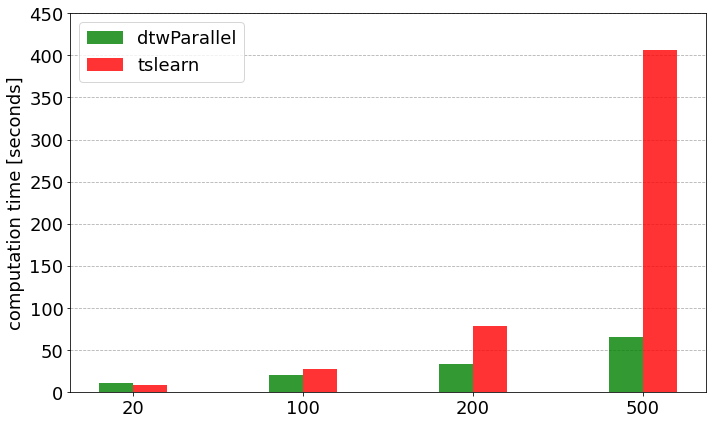

In [15]:
fig,axis = plt.subplots(1,1,figsize=(10,6))

numberOfTestPackage = 4

plt.bar(np.arange(numberOfTestPackage), dtwParallel_value, color='green', width=0.2, alpha=0.8, label="dtwParallel")
plt.bar(np.arange(numberOfTestPackage)+0.2, tslearn_value, color='red', width=0.2, alpha=0.8, label="tslearn")

keys_finales = ['20', '100', '200', '500']
plt.xticks(np.arange(numberOfTestPackage)+0.1, keys_finales, fontsize=18)
keys_finales_2 = np.arange(0,500,50)
plt.yticks(keys_finales_2, fontsize=18)
axis.set_ylabel('computation time [seconds]',fontsize=18) 
plt.tight_layout()
axis.yaxis.grid(linestyle = 'dashed')  # grid lines
axis.set_axisbelow(True)  # grid lines are behind the rest
plt.legend(fontsize=18)

plt.savefig("./Figures/comparativeTime_difflengths.png")

## Computational time of sakoe-chiba and itakura

In [41]:
dicc = {}
n_threads = [2, 4, 8, 16, 32, 64]


data = np.loadtxt('../results_E2_financeData/dtwParallel_505_mult_threads_sakoe_chiba.txt', dtype=str)

for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a

means_sakoe_chiba = {}
for i in dicc.keys():
    means_sakoe_chiba[i] = np.mean(dicc[i])

In [42]:
means_sakoe_chiba

{2: 10.823535807927449,
 4: 10.459057625134786,
 8: 10.192550293604533,
 16: 10.202292760213217,
 32: 11.919313176472981,
 64: 16.69714383421273}

In [43]:
dicc = {}
n_threads = [2, 4, 8, 16, 32, 64]


data = np.loadtxt('../results_E2_financeData/dtwParallel_505_mult_threads_itakura.txt', dtype=str)

for index in range(len(n_threads)): 
    a = data[index*31+1:31*index+31]
    a = [word.rstrip(",[]") for word in a]
    a[0] = a[0][1:]
    if index == len(n_threads)-1:
        a=a[:-1]
    a = [float(i) for i in a]
    dicc[n_threads[index]] = a
    
means_itakura = {}
for i in dicc.keys():
    means_itakura[i] = np.mean(dicc[i])

In [44]:
means_itakura

{2: 27.997201561927795,
 4: 14.88919661839803,
 8: 11.252932850519816,
 16: 10.410646533966064,
 32: 11.401344585418702,
 64: 15.8756493782175}

In [50]:
data = np.loadtxt('../results_E2_financeData/DataResultsTimePaper/dtwParallel_505.txt', dtype=str)
a = [word.rstrip(",[]") for word in data]
a[0] = a[0][1:]
a = [float(i) for i in a]
dtwParallel = np.median(a)
    
values_505 = [dtwParallel, means_sakoe_chiba[8], means_itakura[8]]

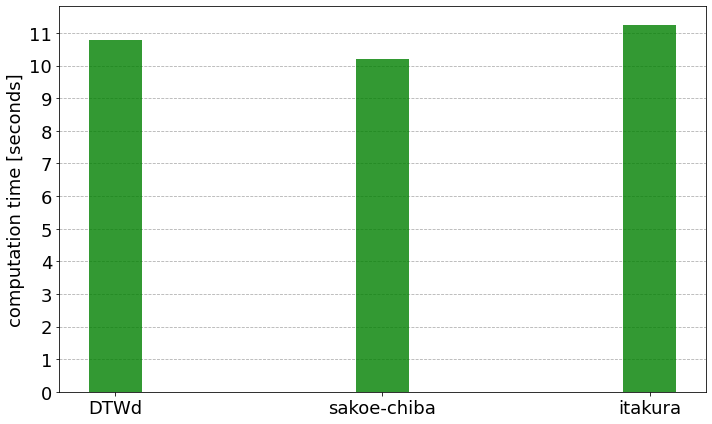

In [51]:
fig,axis = plt.subplots(1,1,figsize=(10,6))

numberOfTestPackage = 3

plt.bar(np.arange(numberOfTestPackage), values_505, color='green', width=0.2, alpha=0.8)

keys_finales = ['DTWd', 'sakoe-chiba', 'itakura']
plt.xticks(np.arange(numberOfTestPackage), keys_finales, fontsize=18)
keys_finales_2 = np.arange(0,12,1)
plt.yticks(keys_finales_2, fontsize=18)
axis.set_ylabel('computation time [seconds]',fontsize=18) 
plt.tight_layout()
axis.yaxis.grid(linestyle = 'dashed')  # grid lines
axis.set_axisbelow(True)  # grid lines are behind the rest
#plt.legend(fontsize=18)

# plt.savefig("./Figures/comparativeTime_difflengths.png")